In [1]:
import rioxarray

In [2]:
import pystac

In [3]:
items = pystac.ItemCollection.from_file("search.json")

In [4]:
items

id: S2A_31UFU_20200328_0_L2A
"bbox: [4.814996623122647, 52.22257539160586, 6.1417542968794585, 53.228577890548]"
datetime: 2020-03-28T10:46:21Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31
sentinel:latitude_band: U


In [22]:
items[0].assets.keys()

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])

In [23]:
items[0].assets["B09"]

href: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B09.tif
type: image/tiff; application=geotiff; profile=cloud-optimized
title: Band 9
owner: S2A_31UFU_20200328_0_L2A
"proj:shape: [1830, 1830]"
"proj:transform: [60, 0, 600000, 0, -60, 5900040, 0, 0, 1]"


In [6]:
b09_href = items[0].assets["B09"].href

In [24]:
b09_href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B09.tif'

In [7]:
b09 = rioxarray.open_rasterio(b09_href)

In [8]:
b09

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [10]:
b09.coords["spatial_ref"]

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes: (12/18)
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 31N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    inverse_flattening:                298.257223563
    reference_ellipsoid_name:          WGS 84
    longitude_of_prime_meridian:       0.0
    ...                                ...
    longitude_of_central_meridian:     3.0
    false_easting:                     500000.0
    false_northing:                    0.0
    scale_factor_at_central_meridian:  0.9996
    spatial_ref:                       PROJCS["WGS 84 / UTM zone 31N",GEOGCS[...
    GeoTransform:                      600000.0 60.0 0.0 5900040.0 0.0 -60.0

In [11]:
b09.rio.crs

CRS.from_epsg(32631)

In [12]:
b09.rio.nodata

0

In [13]:
b09.rio.bounds()

(600000.0, 5790240.0, 709800.0, 5900040.0)

In [14]:
b09.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [25]:
b09

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[    0,     0, ...,  9075,  8139],
        [    0,     0, ..., 10358,  8669],
        ...,
        [    0,     0, ...,  4269,  4179],
        [    0,     0, ...,  3503,  3862]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

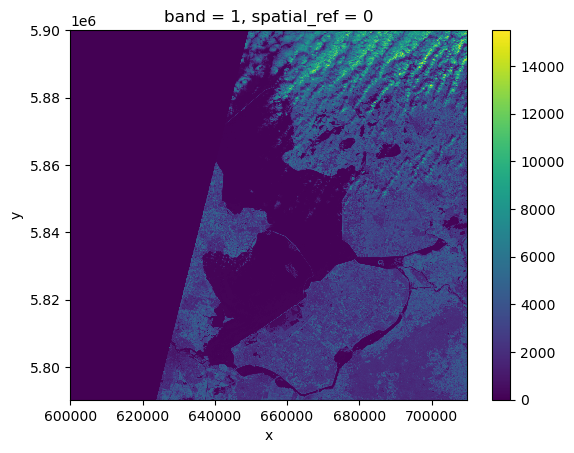

In [15]:
b09.plot()

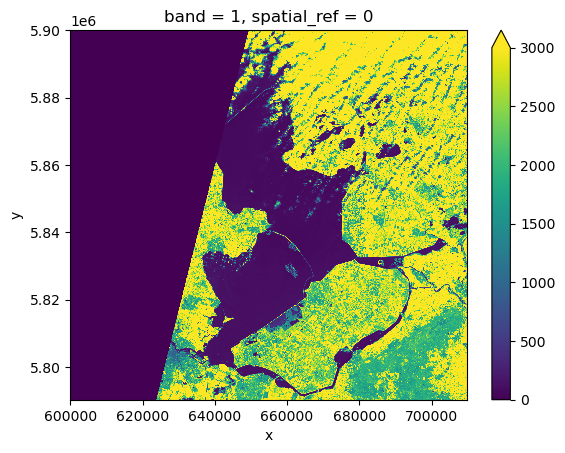

In [18]:
b09.plot(vmax = 3000) # vmin, vmax

In [27]:
type(b09.rio.crs)

rasterio.crs.CRS

In [31]:
b09_epsg = b09.rio.crs.to_epsg()

In [33]:
from pyproj import CRS

In [35]:
crs = CRS(b09_epsg)

In [36]:
crs

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
b09_repr = b09.rio.reproject("EPSG:4326")

In [40]:
b09.rio.reproject?

Signature:
b09.rio.reproject(
    dst_crs: Any,
    resolution: Union[float, tuple[float, float], NoneType] = None,
    shape: Optional[tuple[int, int]] = None,
    transform: Optional[affine.Affine] = None,
    resampling: rasterio.enums.Resampling = <Resampling.nearest: 0>,
    nodata: Optional[float] = None,
    **kwargs,
) -> xarray.core.dataarray.DataArray
Docstring:
Reproject :obj:`xarray.DataArray` objects

Powered by :func:`rasterio.warp.reproject`

.. note:: Only 2D/3D arrays with dimensions 'x'/'y' are currently supported.
    Requires either a grid mapping variable with 'spatial_ref' or
    a 'crs' attribute to be set containing a valid CRS.
    If using a WKT (e.g. from spatiareference.org), make sure it is an OGC WKT.

.. versionadded:: 0.0.27 shape
.. versionadded:: 0.0.28 transform
.. versionadded:: 0.5.0 nodata, kwargs

Parameters
----------
dst_crs: str
    OGC WKT string or Proj.4 string.
resolution: float or tuple(float, float), optional
    Size of a destination pix

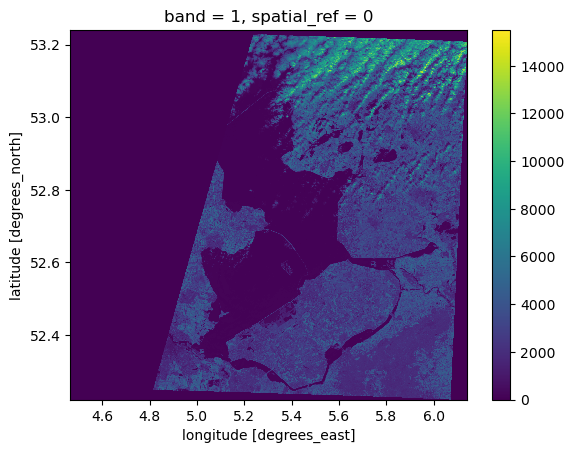

In [39]:
b09_repr.plot()

In [41]:
b09.min()

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0

In [42]:
b09.mean()

<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0

In [43]:
b09.min(dim="x")

<xarray.DataArray (band: 1, y: 1830)>
array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0

In [44]:
import numpy as np

In [45]:
np.nan

nan

In [46]:
b09_nodata = rioxarray.open_rasterio(b09_href, masked=True)

In [47]:
b09_nodata

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [48]:
b09_nodata.rio.nodata

nan

In [50]:
b09.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

In [49]:
b09_nodata.values

array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)

In [54]:
b09_nodata.min()

<xarray.DataArray ()>
array(8., dtype=float32)
Coordinates:
    spatial_ref  int64 0

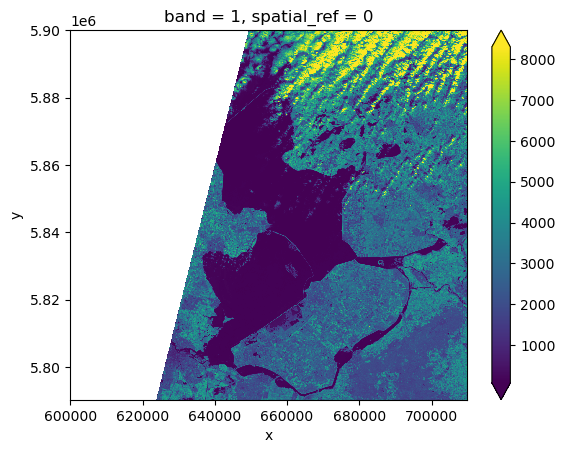

In [56]:
b09_nodata.plot(robust=True)